# Generating "Watercolours"

Inspired by https://diegoinacio.github.io/creative-coding-notebooks-page/pages/imgFX_scatterCircles.html.

In [1]:
# This activates the external code we'll need for this demo
from PIL import Image, ImageDraw
import numpy as np
import random

## The Original Image

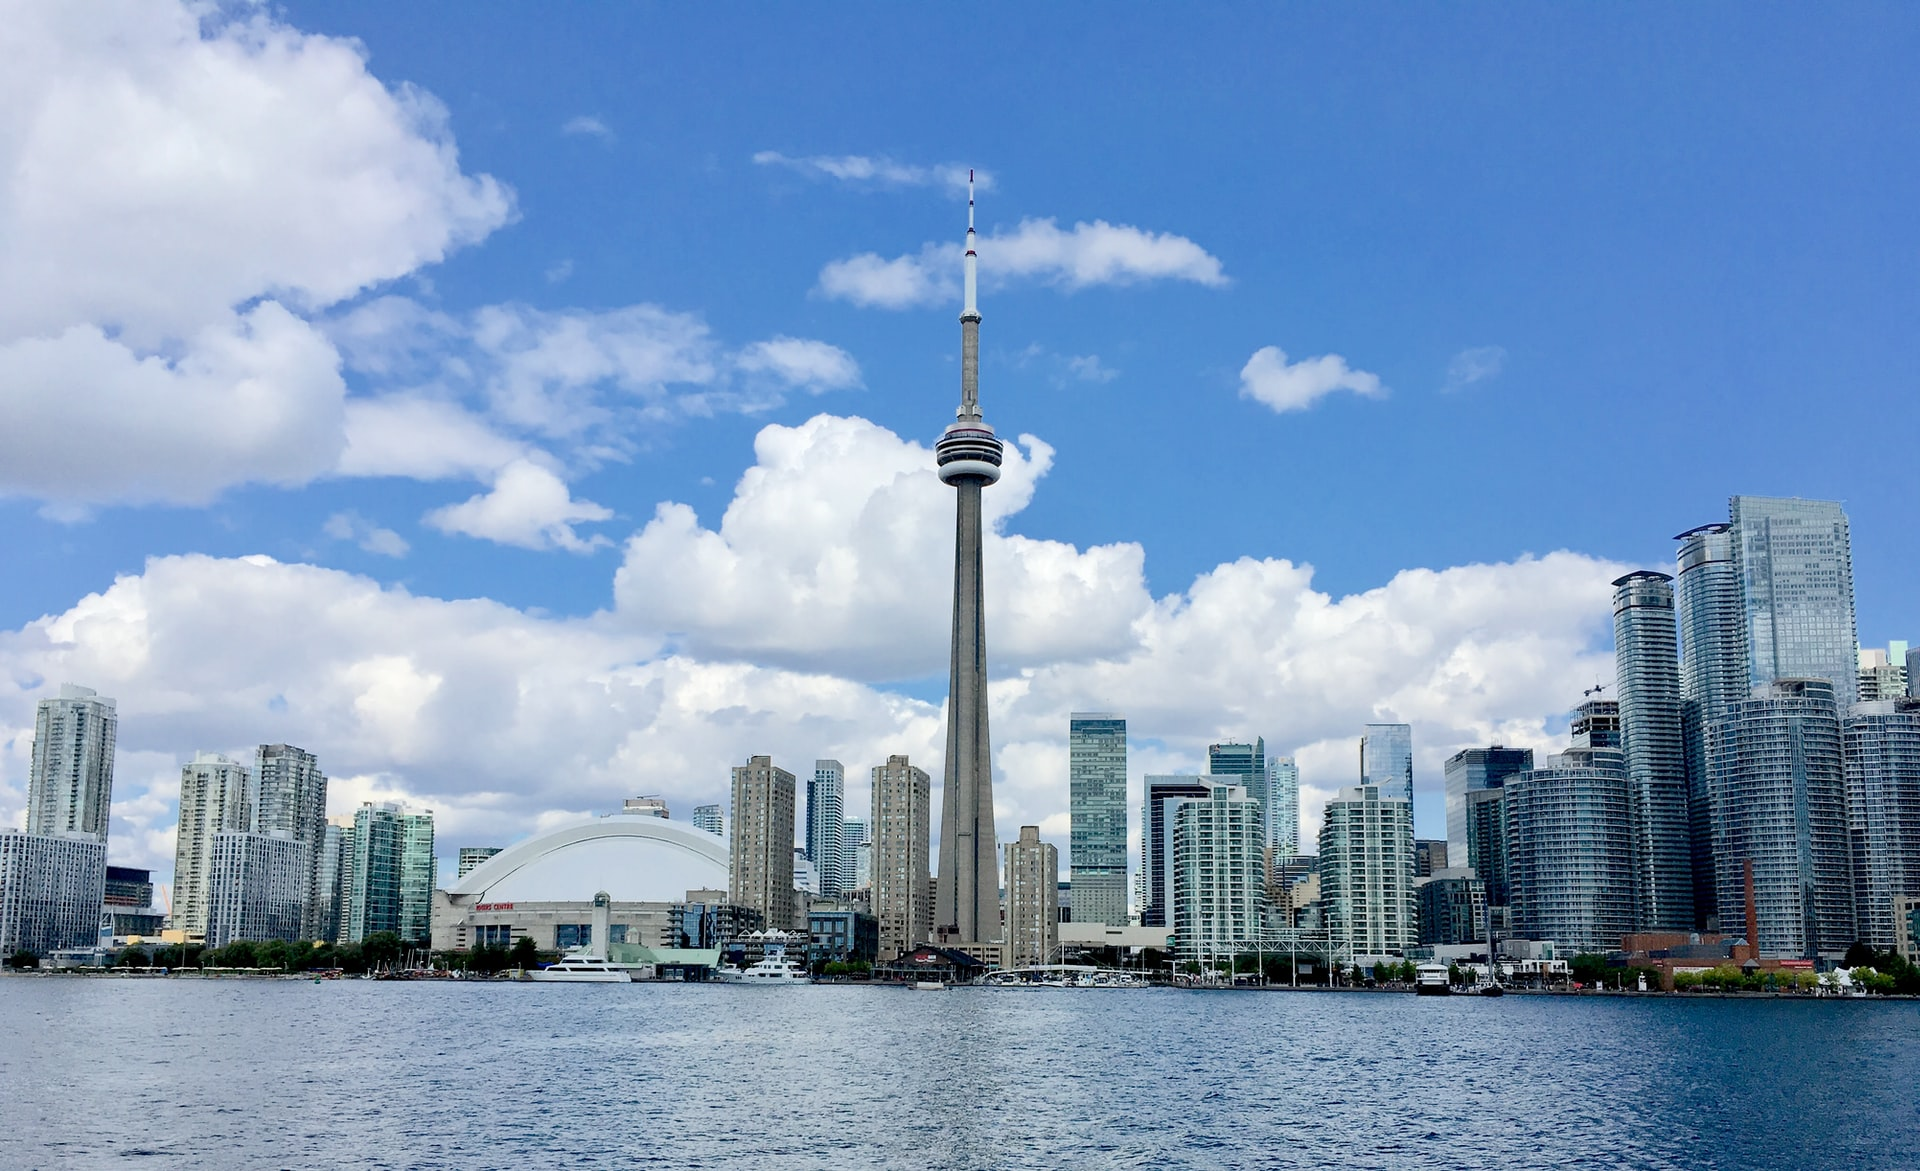

In [16]:
# Photo from https://unsplash.com/photos/XRnDVDOOS2w
image = Image.open("data/toronto.jpg")
image

## The Generated Image

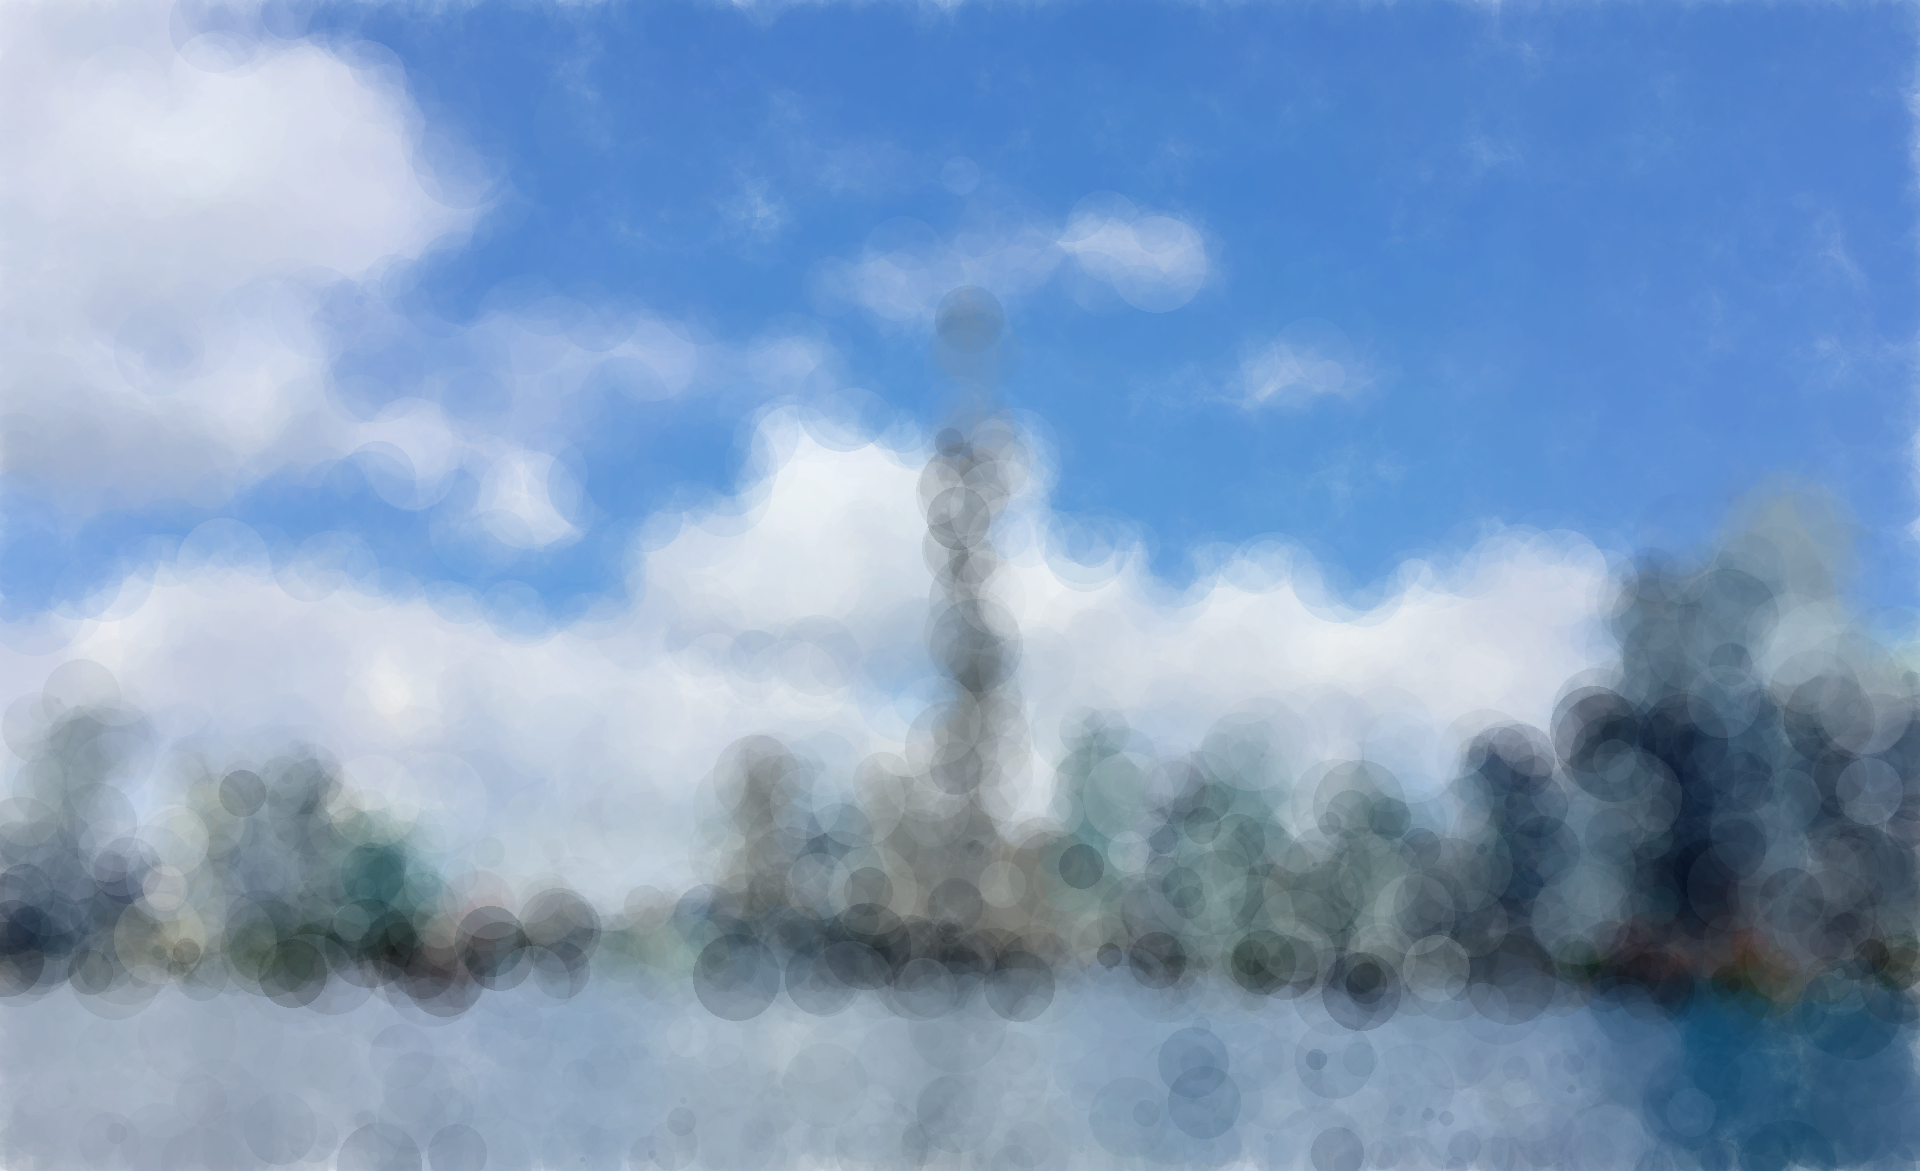

In [17]:
def blur_image(input_image, num_circles = 20000, max_radius = 15, max_opacity = 150):
    input_pixels = np.array(input_image)
    input_x, input_y = input_image.size

    # Create a new canvas the same size as the original
    output_image = Image.new('RGB', input_image.size, color=(255, 255, 255))
    draw = ImageDraw.Draw(output_image, mode="RGBA")

    for i in range(num_circles):
        # Pick random a random point, circle radius, and opacity
        # The new circle's colour is based on a pixel from the original image
        rand_x = random.randint(0, input_x - 1)
        rand_y = random.randint(0, input_y - 1)
        radius = random.randint(1, max_radius)

        colour = tuple(input_pixels[rand_y][rand_x])
        colour += (random.randint(10, max_opacity),)

        # Draw the circle onto the new canvas
        draw.ellipse([rand_x - radius, rand_y - radius, rand_x + radius, rand_y + radius], fill=colour)

    # Show the final canvas
    display(output_image)


blur_image(
    input_image=image,
    num_circles=25000,
    max_radius=50,
    max_opacity=50
)